In [1]:
import os
import sys
sys.path.append("../")
%load_ext autoreload

In [2]:
os.listdir("..\data")
path = "..\data"
targets = []
for folder in os.listdir(path):
    for f in os.listdir(os.path.join(path, folder)):
        #if f.endswith(".png") or f.endswith(".jpg"):
        if f.endswith(".pdf"):
            targets.append(os.path.join(path, folder, f))
print(targets)

['..\\data\\pdfs\\005-366-fey-squirrel-and-tomb-guardian-compressed.pdf', '..\\data\\pdfs\\006-366-flying-spider-compressed.pdf', '..\\data\\pdfs\\007-366-giant-wolf-compressed.pdf', '..\\data\\pdfs\\008-366-quogwat-compressed.pdf', '..\\data\\pdfs\\009-366-arnitiko-compressed.pdf', '..\\data\\pdfs\\010-366-waterspout-compressed.pdf', '..\\data\\pdfs\\011-366-gargantuan-hamster_and_squid-compressed.pdf', '..\\data\\pdfs\\012-366-el-cadejo-compressed.pdf', '..\\data\\pdfs\\922210-OUTCLASSED_Expansion__Tashas_Panopticon_of_Nemeses.pdf', '..\\data\\pdfs\\Cosmic Dragon Breviary - SpectreCreations.pdf', "..\\data\\pdfs\\D&D 5E - Mordenkainen's Tome of Foes.pdf", '..\\data\\pdfs\\Episode 1 - In Scarlet Flames.pdf', '..\\data\\pdfs\\Guildmasters Guide to Ravnica.pdf', '..\\data\\pdfs\\OUTCLASSED_full.pdf', '..\\data\\pdfs\\Warlock 15 - Boss Monsters.pdf']


In [3]:
%autoreload 2

from data_loaders.textract_image_loader import TextractImageLoader
from data_loaders.pdf_loader import PDFLoader

from outputs.default_writer import DefaultWriter
from outputs.pluto_writer import PlutoWriter

from extractor.extractor import StatblockExtractor
from utils.config import get_config, get_argparser
from utils.logger import get_logger

from extractor.creature_printer import pretty_format_creature

# Get arguments
parser = get_argparser()
args = parser.parse_args([r"C:\Users\jenni\OneDrive\DnD\Adventures, Settings & Monsters\Community\Unearthed Arcana\Befouler.pdf", "--config", r"..\default.conf"])
print(args)

# Get config file
config = get_config(args)
config.set("default", "use_cache", "true")
config.set("default", "debug", "true")

logger = get_logger(args.debug, args.logs)

se = StatblockExtractor(config, logger)
se.register_data_loader(TextractImageLoader)
se.register_data_loader(PDFLoader)

se.register_output_writer(DefaultWriter, append=True)
se.register_output_writer(PlutoWriter, append=True)

Namespace(target='C:\\Users\\jenni\\OneDrive\\DnD\\Adventures, Settings & Monsters\\Community\\Unearthed Arcana\\Befouler.pdf', source=None, authors=None, overwrite=False, url=None, output=None, output_format='default', cache='.cache', config='..\\default.conf', logs=None, debug=False, pages=None, no_cache=False, flush_cache=False, yes=False)


C:\Users\jenni\OneDrive\DnD\Adventures, Settings & Monsters\Community\Unearthed Arcana\Befouler.pdf
Page 0:

Befouler                                                                                                        
Medium aberration, neutral evil                          -------------------------------------------------------
-------------------------------------------------------  Actions                                                
Armor Class 15 (natural armor)                                                                                  
Hit Points 60 (11d8+11)                                  Multiattack. The befouler makes two claw attacks and
Speed 10 ft., swim 40 ft.                                uses Befoul.                                           
-------------------------------------------------------                                                         
     STR     DEX     CON     INT     WIS     CHA         Claw. Melee Weapon Attack: +6 to hit, reach 10

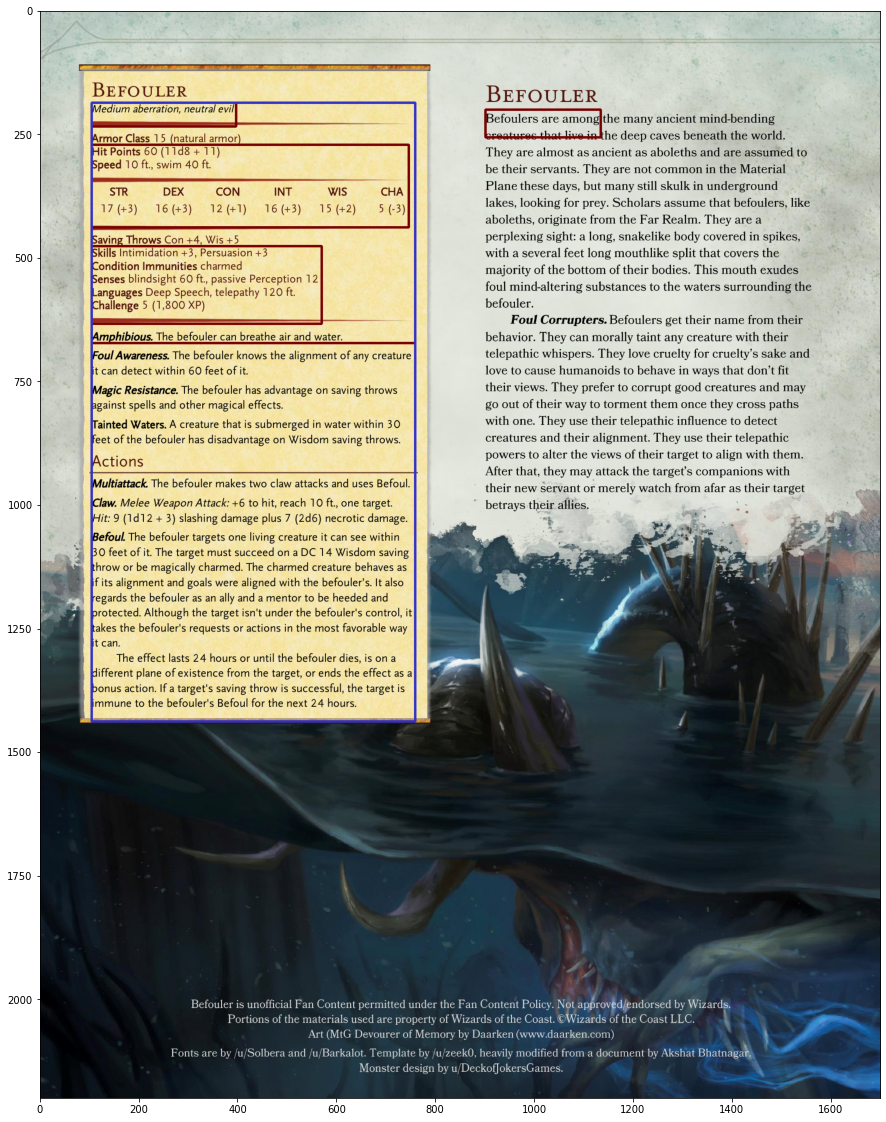

In [4]:
#args.output = "../outclassed.json"
#args.output_format = "5et"

se.select_writer(args.output_format)

targets = [r"C:\Users\jenni\OneDrive\DnD\Adventures, Settings & Monsters\Community\Unearthed Arcana\Befouler.pdf"]
for target in targets:
    print(target)
    logger.info("Loading creatures from {}".format(target))
    
    results = se.parse(target, args.output, draw_clusters=True, draw_columns=True, draw_statblocks=True)
    parsed_statblocks, statblocks = results
    statblocks = statblocks[0]

    num_pages = len(statblocks.keys())
    logger.info("Found {} page{} of statblocks".format(num_pages, 's' if num_pages > 1 else ''))
    
    for page in parsed_statblocks[0]:
        print("Page {}:".format(page))
        for creature in parsed_statblocks[0][page]:
            print()
            print(pretty_format_creature(creature))
            print()

In [45]:
parsed_statblocks[0][0][0].data

{'name': 'Befouler',
 'size': 'medium',
 'creature_type': {'type': 'aberration', 'swarm': False, 'swarm_size': None},
 'alignment': 'neutral evil',
 'ac': [{'ac': 15, 'from': ['natural armor'], 'condition': ''}],
 'hp': {'formula': '11d8+11', 'average': 60},
 'speed': [{'type': 'walk', 'distance': 10, 'measure': 'ft'},
  {'type': 'swim', 'distance': 40, 'measure': 'ft'}],
 'abilities': {'str': 17,
  'dex': 16,
  'con': 12,
  'int': 16,
  'wis': 15,
  'cha': 5},
 'saves': {'con': 4, 'wis': 5},
 'skills': [{'skill': 'Intimidation', 'mod': 3},
  {'skill': 'Persuasion', 'mod': 3}],
 'condition_immunities': [{'type': ['charmed'],
   'pre_text': '',
   'post_text': ''}],
 'senses': [{'sense': 'blindsight', 'distance': 60, 'measure': 'ft'}],
 'passive': 12,
 'languages': ['Deep Speech', 'telepathy 120 ft.'],
 'cr': {'cr': '5'},
 'features': [{'title': 'Amphibious',
   'text': 'The befouler can breathe air and water.'},
  {'title': 'Foul Awareness',
   'text': 'The befouler knows the alignment